<a href="https://colab.research.google.com/github/SamanehDorudian/Final-project-6220/blob/main/hi/Copy_of_Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('/content/bird.csv')
df.head(25)

huml   humw   ulnal  ulnaw   feml  femw    tibl  tibw   tarl  tarw type
0    80.78   6.68   72.01   4.88  41.81  3.70    5.50  4.03  38.70  3.84   SW
1    88.91   6.63   80.53   5.59  47.04  4.30   80.22  4.51  41.50  4.01   SW
2    79.97   6.37   69.26   5.28  43.07  3.90   75.35  4.04  38.31  3.34   SW
3    77.65   5.70   65.76   4.77  40.04  3.52   69.17  3.40  35.78  3.41   SW
4    62.80   4.84   52.09   3.73  33.95  2.72   56.27  2.96  31.88  3.13   SW
5    61.92   4.78   50.46   3.47  49.52  4.41   56.95  2.73  29.07  2.83   SW
6    79.73   5.94   67.39   4.50  42.07  3.41   71.26  3.56  37.22  3.64   SW
7    86.98   5.68   74.52   4.55  44.46  3.78   76.02  3.81  37.94  3.81   SW
8   118.20   7.82  116.64   6.13  59.33  5.45  110.00  5.58  61.62  4.37   SW
9   145.00  10.42  144.00   7.05  70.96  7.44  120.00  7.31  78.67  6.34   SW
10  165.00  11.45  156.00   8.68  80.25  7.85  143.00  8.25  86.61  6.63   SW
11  186.00   9.83  152.00   8.76  56.02  7.02  185.00  8.07  90.80  4.59   SW
12  172.00   8.44  142.00   8.43  52.18  6.68  180.00  9.62  82.58  5.50   SW
13  148.91   6.78  121.35   6.50  44.29  6.33  155.00  6.68  73.71  4.24   SW
14  149.19   6.98  121.48   6.21  43.33  5.39  155.00  6.61  75.65  3.36   SW
15  140.59   6.59  115.97   5.81  39.75  5.61  166.00  7.83  74.86  3.52   SW
16  135.23   6.22  108.78   5.83  37.99  5.13  157.00  7.18  72.44  3.53   SW
17  124.53   6.01  100.37   5.82  34.54  5.43  145.00  7.12  65.92  3.28   SW
18  127.03   6.18  102.53   5.64  36.52  4.89  150.00  6.78  67.27  3.06   SW
19  106.02   4.47   95.79   4.33  41.96  4.80  129.59  6.94  70.29  3.35   SW
20  113.84   4.80  100.71   4.39  43.95  5.08  133.27  7.41  70.91  2.69   SW
21  108.62   5.04   97.70   4.66  45.08  5.78  128.00  7.14  65.48  4.25   SW
22  110.33   5.86   97.10   4.60  43.82  5.73  126.00  7.86  64.17  3.84   SW
23   63.62   3.42   59.00   2.75  30.16  2.92   74.66  4.38  39.26  1.97   SW
24   70.73   3.69   65.19   2.93  32.52  3.54   80.42  4.36  43.70  2.28   SW

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    413 non-null    float64
 1   humw    413 non-null    float64
 2   ulnal   413 non-null    float64
 3   ulnaw   413 non-null    float64
 4   feml    413 non-null    float64
 5   femw    413 non-null    float64
 6   tibl    413 non-null    float64
 7   tibw    413 non-null    float64
 8   tarl    413 non-null    float64
 9   tarw    413 non-null    float64
 10  type    413 non-null    object 
dtypes: float64(10), object(1)
memory usage: 35.6+ KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

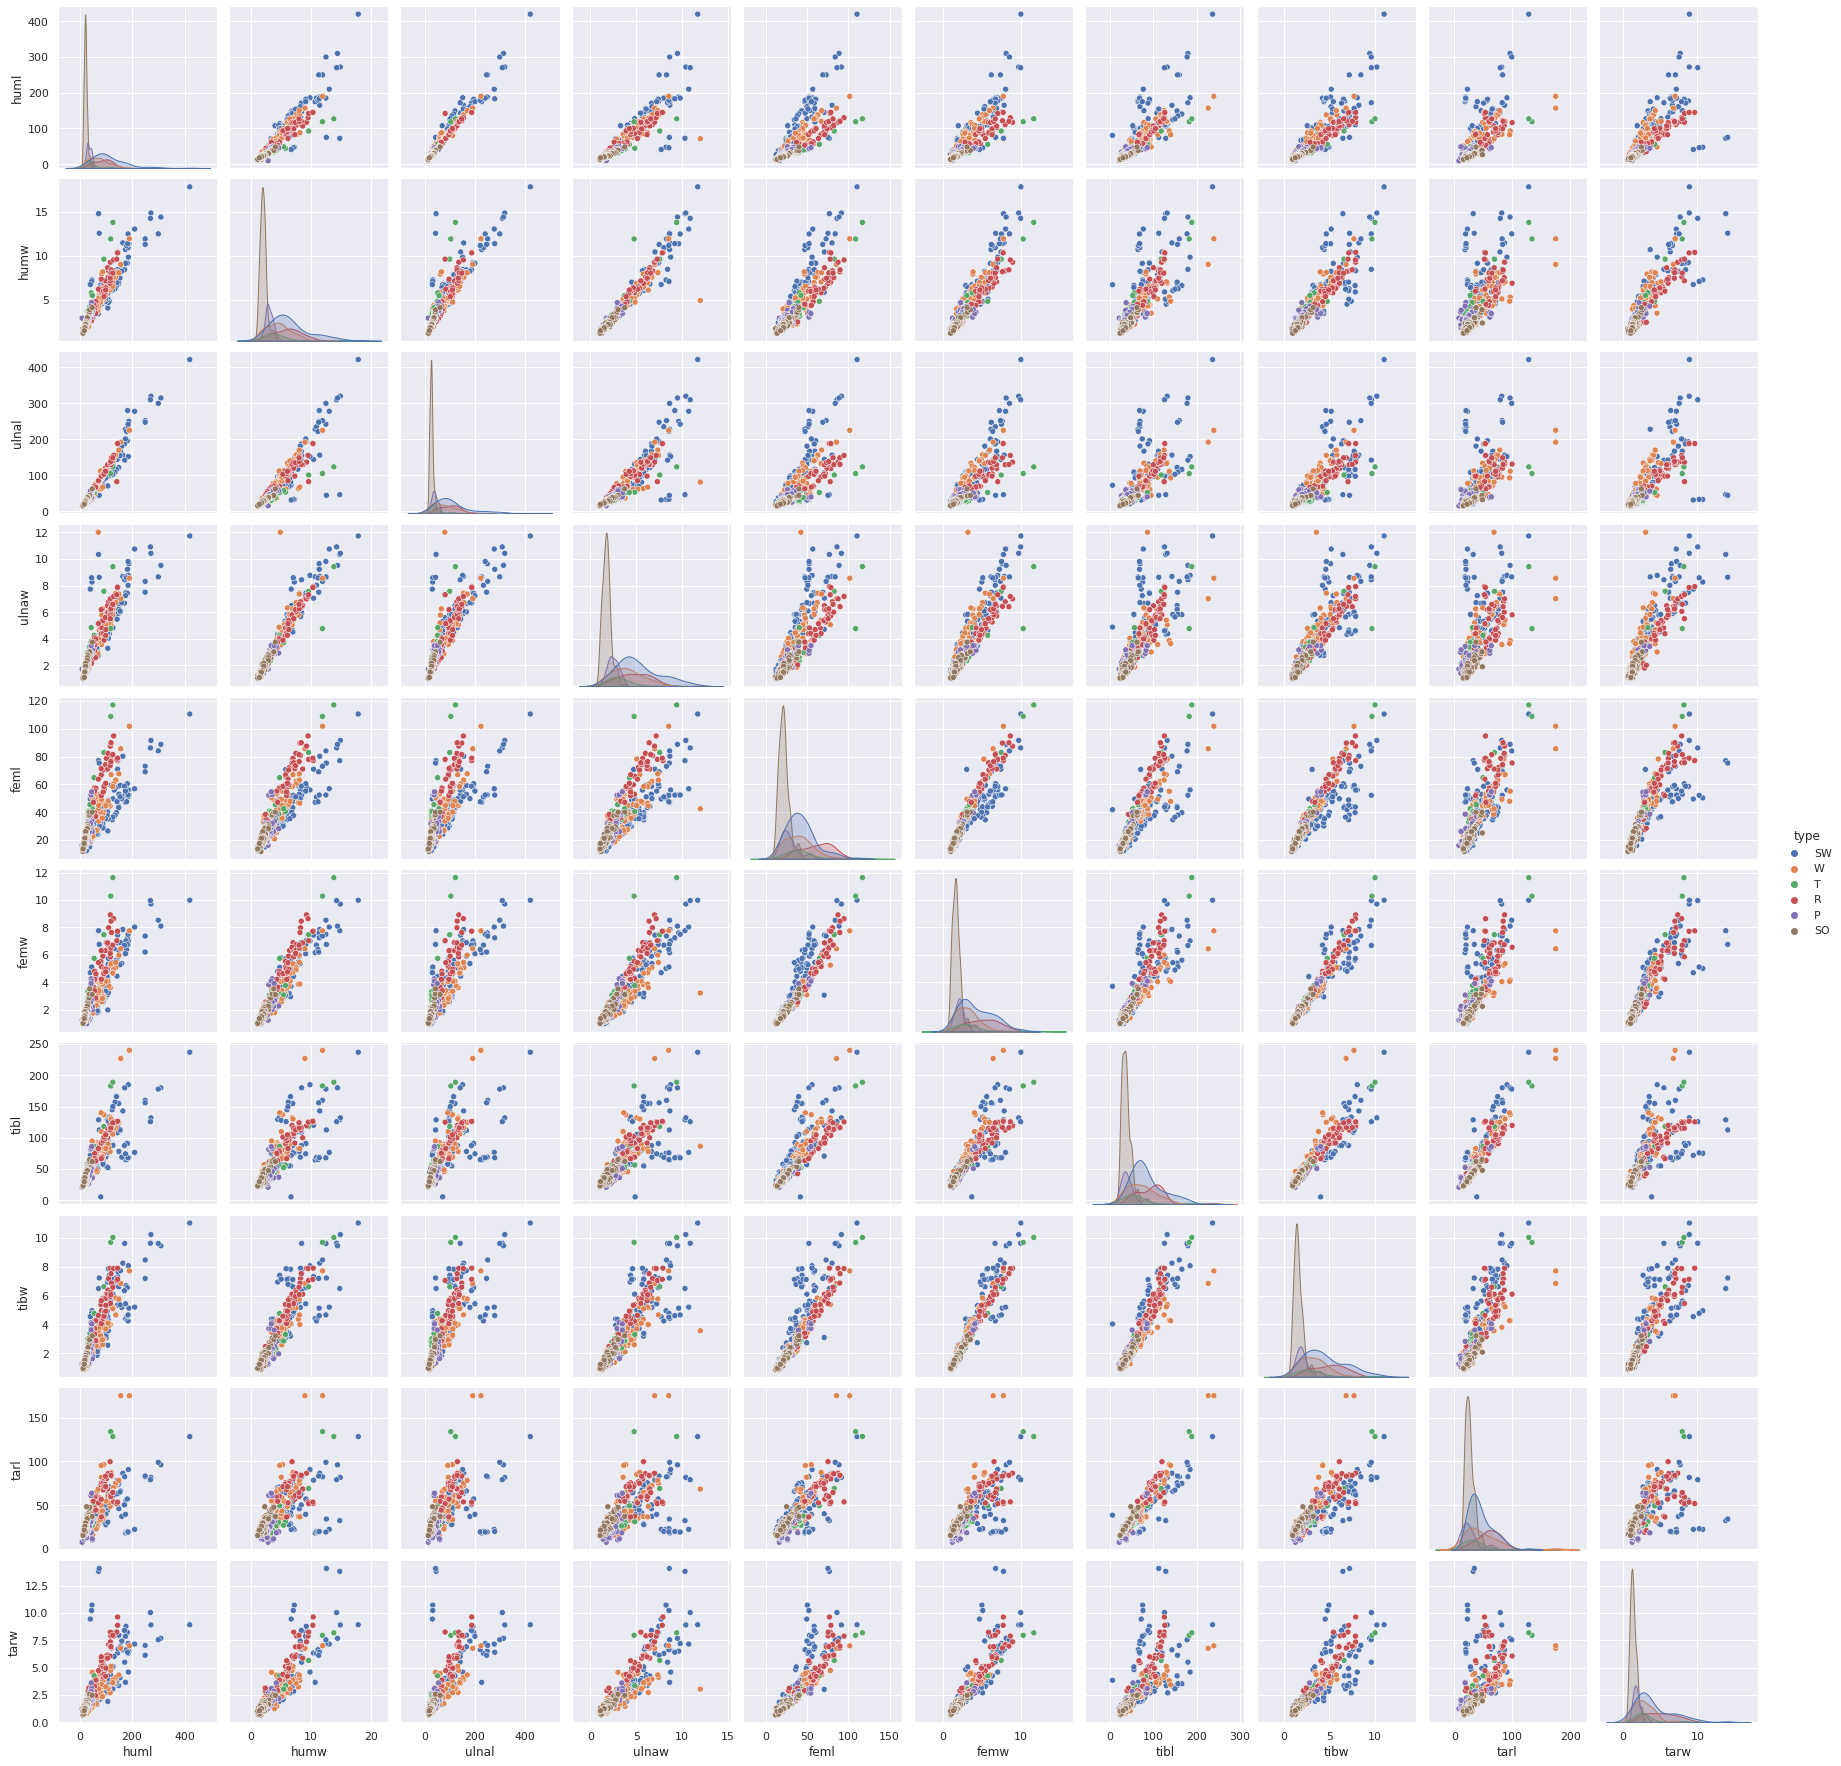

In [ ]:
sns.pairplot(df, hue='type')
plt.show()

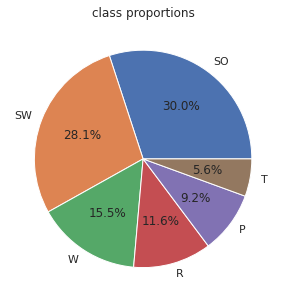

In [ ]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('class proportions')
plt.show()


**Data Matrix**

In [ ]:
X = df.drop(columns=['type'])
X.head(10)

huml   humw   ulnal  ulnaw   feml  femw    tibl  tibw   tarl  tarw
0   80.78   6.68   72.01   4.88  41.81  3.70    5.50  4.03  38.70  3.84
1   88.91   6.63   80.53   5.59  47.04  4.30   80.22  4.51  41.50  4.01
2   79.97   6.37   69.26   5.28  43.07  3.90   75.35  4.04  38.31  3.34
3   77.65   5.70   65.76   4.77  40.04  3.52   69.17  3.40  35.78  3.41
4   62.80   4.84   52.09   3.73  33.95  2.72   56.27  2.96  31.88  3.13
5   61.92   4.78   50.46   3.47  49.52  4.41   56.95  2.73  29.07  2.83
6   79.73   5.94   67.39   4.50  42.07  3.41   71.26  3.56  37.22  3.64
7   86.98   5.68   74.52   4.55  44.46  3.78   76.02  3.81  37.94  3.81
8  118.20   7.82  116.64   6.13  59.33  5.45  110.00  5.58  61.62  4.37
9  145.00  10.42  144.00   7.05  70.96  7.44  120.00  7.31  78.67  6.34

In [ ]:
X.describe().transpose()

count       mean        std    min    25%    50%    75%     max
huml   413.0  64.874867  54.056078   9.85  25.36  44.18  90.49  420.00
humw   413.0   4.381235   2.861460   1.14   2.20   3.50   5.82   17.84
ulnal  413.0  69.197409  58.929490  14.09  28.16  43.71  97.52  422.00
ulnaw  413.0   3.606538   2.190150   1.00   1.87   2.96   4.77   12.00
feml   413.0  36.822446  19.899356  11.83  21.35  31.09  47.09  117.07
femw   413.0   3.221768   2.021169   0.93   1.72   2.52   4.11   11.64
tibl   413.0  64.615642  37.977929   5.50  36.35  51.88  82.87  240.00
tibw   413.0   3.182324   2.084124   0.87   1.56   2.49   4.25   11.03
tarl   413.0  39.309806  23.272704   7.77  23.05  31.74  50.44  175.00
tarw   413.0   2.944891   2.194744   0.66   1.43   2.24   3.52   14.09

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

huml      humw     ulnal     ulnaw      feml      femw      tibl  \
0  0.294591  0.804328  0.047786  0.582155  0.250943  0.236899 -1.558467   
1  0.445173  0.786834  0.192541  0.906727  0.514084  0.534117  0.411378   
2  0.279588  0.695861  0.001063  0.765012  0.314338  0.335971  0.282990   
3  0.236618  0.461430 -0.058402  0.531869  0.161887  0.147733  0.120067   
4 -0.038430  0.160520 -0.290655  0.056440 -0.144524 -0.248557 -0.220016   
5 -0.054729  0.139526 -0.318349 -0.062417  0.638863  0.588607 -0.202089   
6  0.275143  0.545405 -0.030708  0.408441  0.264025  0.093243  0.175165   
7  0.409426  0.454432  0.090431  0.431298  0.384275  0.276528  0.300653   
8  0.987674  1.203210  0.806050  1.153584  1.132441  1.103784  1.196469   
9  1.484057  2.112939  1.270897  1.574156  1.717591  2.089557  1.460099   

       tibw      tarl      tarw  
0  0.407223 -0.026234  0.408337  
1  0.637815  0.094224  0.485888  
2  0.412027 -0.043013  0.180243  
3  0.104571 -0.151855  0.212176  
4 -0.106805 -0.319637  0.084444  
5 -0.217297 -0.440526 -0.052412  
6  0.181435 -0.089905  0.317099  
7  0.301535 -0.058930  0.394651  
8  1.151843  0.959805  0.650116  
9  1.982935  1.693311  1.548803

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
huml   413.0 -2.064531e-16  1.001213 -1.019157 -0.731884 -0.383305  0.474437   
humw   413.0  2.064531e-16  1.001213 -1.134095 -0.763205 -0.308340  0.503418   
ulnal  413.0 -2.064531e-16  1.001213 -0.936276 -0.697226 -0.433031  0.481201   
ulnaw  413.0  6.881770e-17  1.001213 -1.191562 -0.793847 -0.295560  0.531869   
feml   413.0  6.881770e-17  1.001213 -1.257466 -0.778478 -0.288421  0.516600   
femw   413.0  1.032265e-16  1.001213 -1.135257 -0.743920 -0.347630  0.439998   
tibl   413.0 -1.376354e-16  1.001213 -1.558467 -0.745168 -0.335750  0.481240   
tibw   413.0 -2.408619e-16  1.001213 -1.110840 -0.779364 -0.332593  0.512911   
tarl   413.0 -6.881770e-17  1.001213 -1.356871 -0.699512 -0.325660  0.478831   
tarw   413.0 -1.720442e-16  1.001213 -1.042337 -0.691073 -0.321562  0.262357   

            max  
huml   6.577537  
humw   4.709166  
ulnal  5.994121  
ulnaw  3.837016  
feml   4.037562  
femw   4.170082  
tibl   4.623661  
tibw   3.770022  
tarl   5.837515  
tarw   5.084249

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

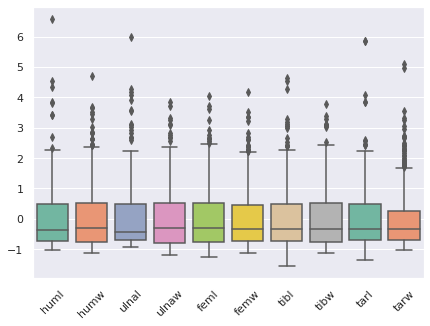

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

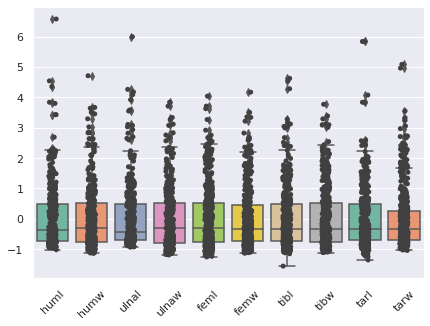

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

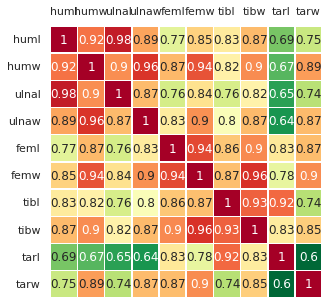

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

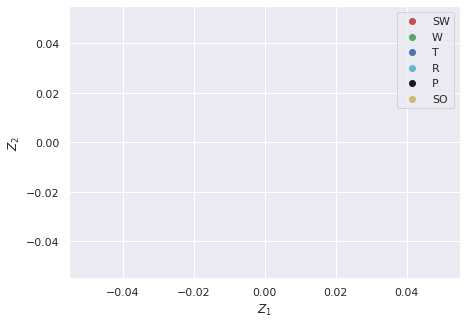

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_SW = np.where(y == 0)
idx_W = np.where(y == 1)
idx_T = np.where(y == 2)
idx_R = np.where(y == 3)
idx_P = np.where(y == 4)
idx_SO = np.where(y == 5)

plt. figure()
plt.scatter(Z[idx_SW,0], Z[idx_SW,1], c='r', label='SW')
plt.scatter(Z[idx_W,0], Z[idx_W,1], c='g', label='W')
plt.scatter(Z[idx_T,0], Z[idx_T,1], c='b', label='T')
plt.scatter(Z[idx_R,0], Z[idx_R,1], c='c', label='R')
plt.scatter(Z[idx_P,0], Z[idx_P,1], c='k', label='P')
plt.scatter(Z[idx_SO,0], Z[idx_SO,1], c='y', label='SO')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

[[ 0.31679323 -0.22801403 -0.47579624 -0.02762954 -0.205473    0.14466737
  -0.19273832 -0.15077461  0.32074065  0.62817417]
 [ 0.32916791 -0.26376568  0.04193145  0.06237177  0.20488572 -0.17027368
  -0.45112436  0.6866773   0.1857907  -0.18947111]
 [ 0.30831659 -0.30844415 -0.47937094 -0.4051338  -0.06400657  0.15213172
   0.21259001 -0.05376342 -0.31560934 -0.49085438]
 [ 0.31978823 -0.30300529  0.04446893  0.41420847  0.6232911  -0.16292071
   0.34037919 -0.3146609   0.0387464   0.03116784]
 [ 0.31995173  0.19333227  0.32300021 -0.56093795  0.20742907 -0.17898944
  -0.38032758 -0.45136673  0.12367972 -0.050312  ]
 [ 0.33281255  0.00399039  0.21893148 -0.14956618 -0.2362261  -0.46413245
   0.28776347  0.23326156 -0.4875299   0.41568375]
 [ 0.31509312  0.39073624 -0.15574739  0.4669284  -0.03214099  0.15986956
  -0.43283444 -0.14813634 -0.51513993 -0.0671688 ]
 [ 0.33098522  0.12936364  0.06287433  0.28899026 -0.56136715 -0.29803072
   0.17523392 -0.15125399  0.43152231 -0.37748337]


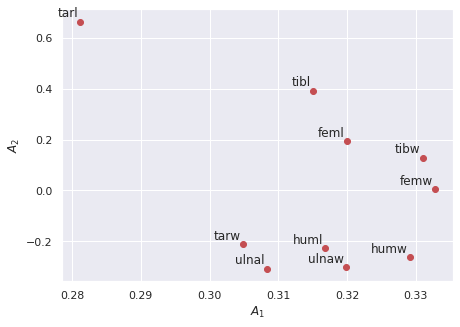

In [ ]:
A = pca.components_.T 
print(A)

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


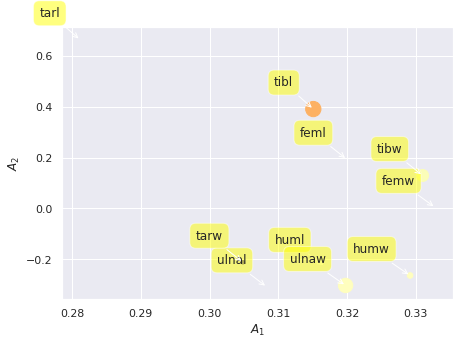

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[8.56351978e+00 6.56872967e-01 4.26804333e-01 1.24448118e-01
 9.06731644e-02 7.07107615e-02 3.64163427e-02 2.84936590e-02
 1.90470151e-02 7.28570639e-03]


Text(0, 0.5, 'Explained variance')

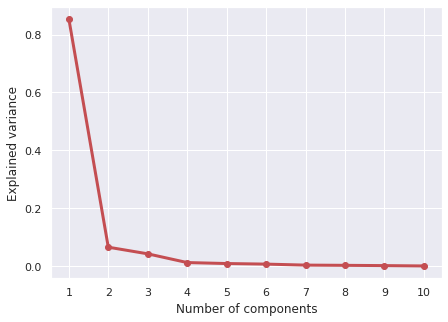

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
print(Lambda)

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

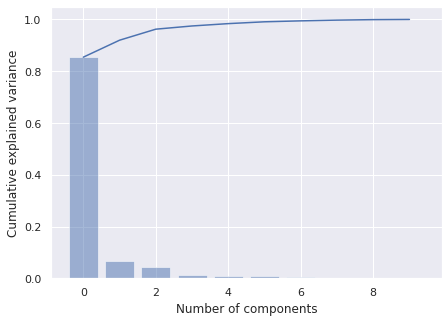

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

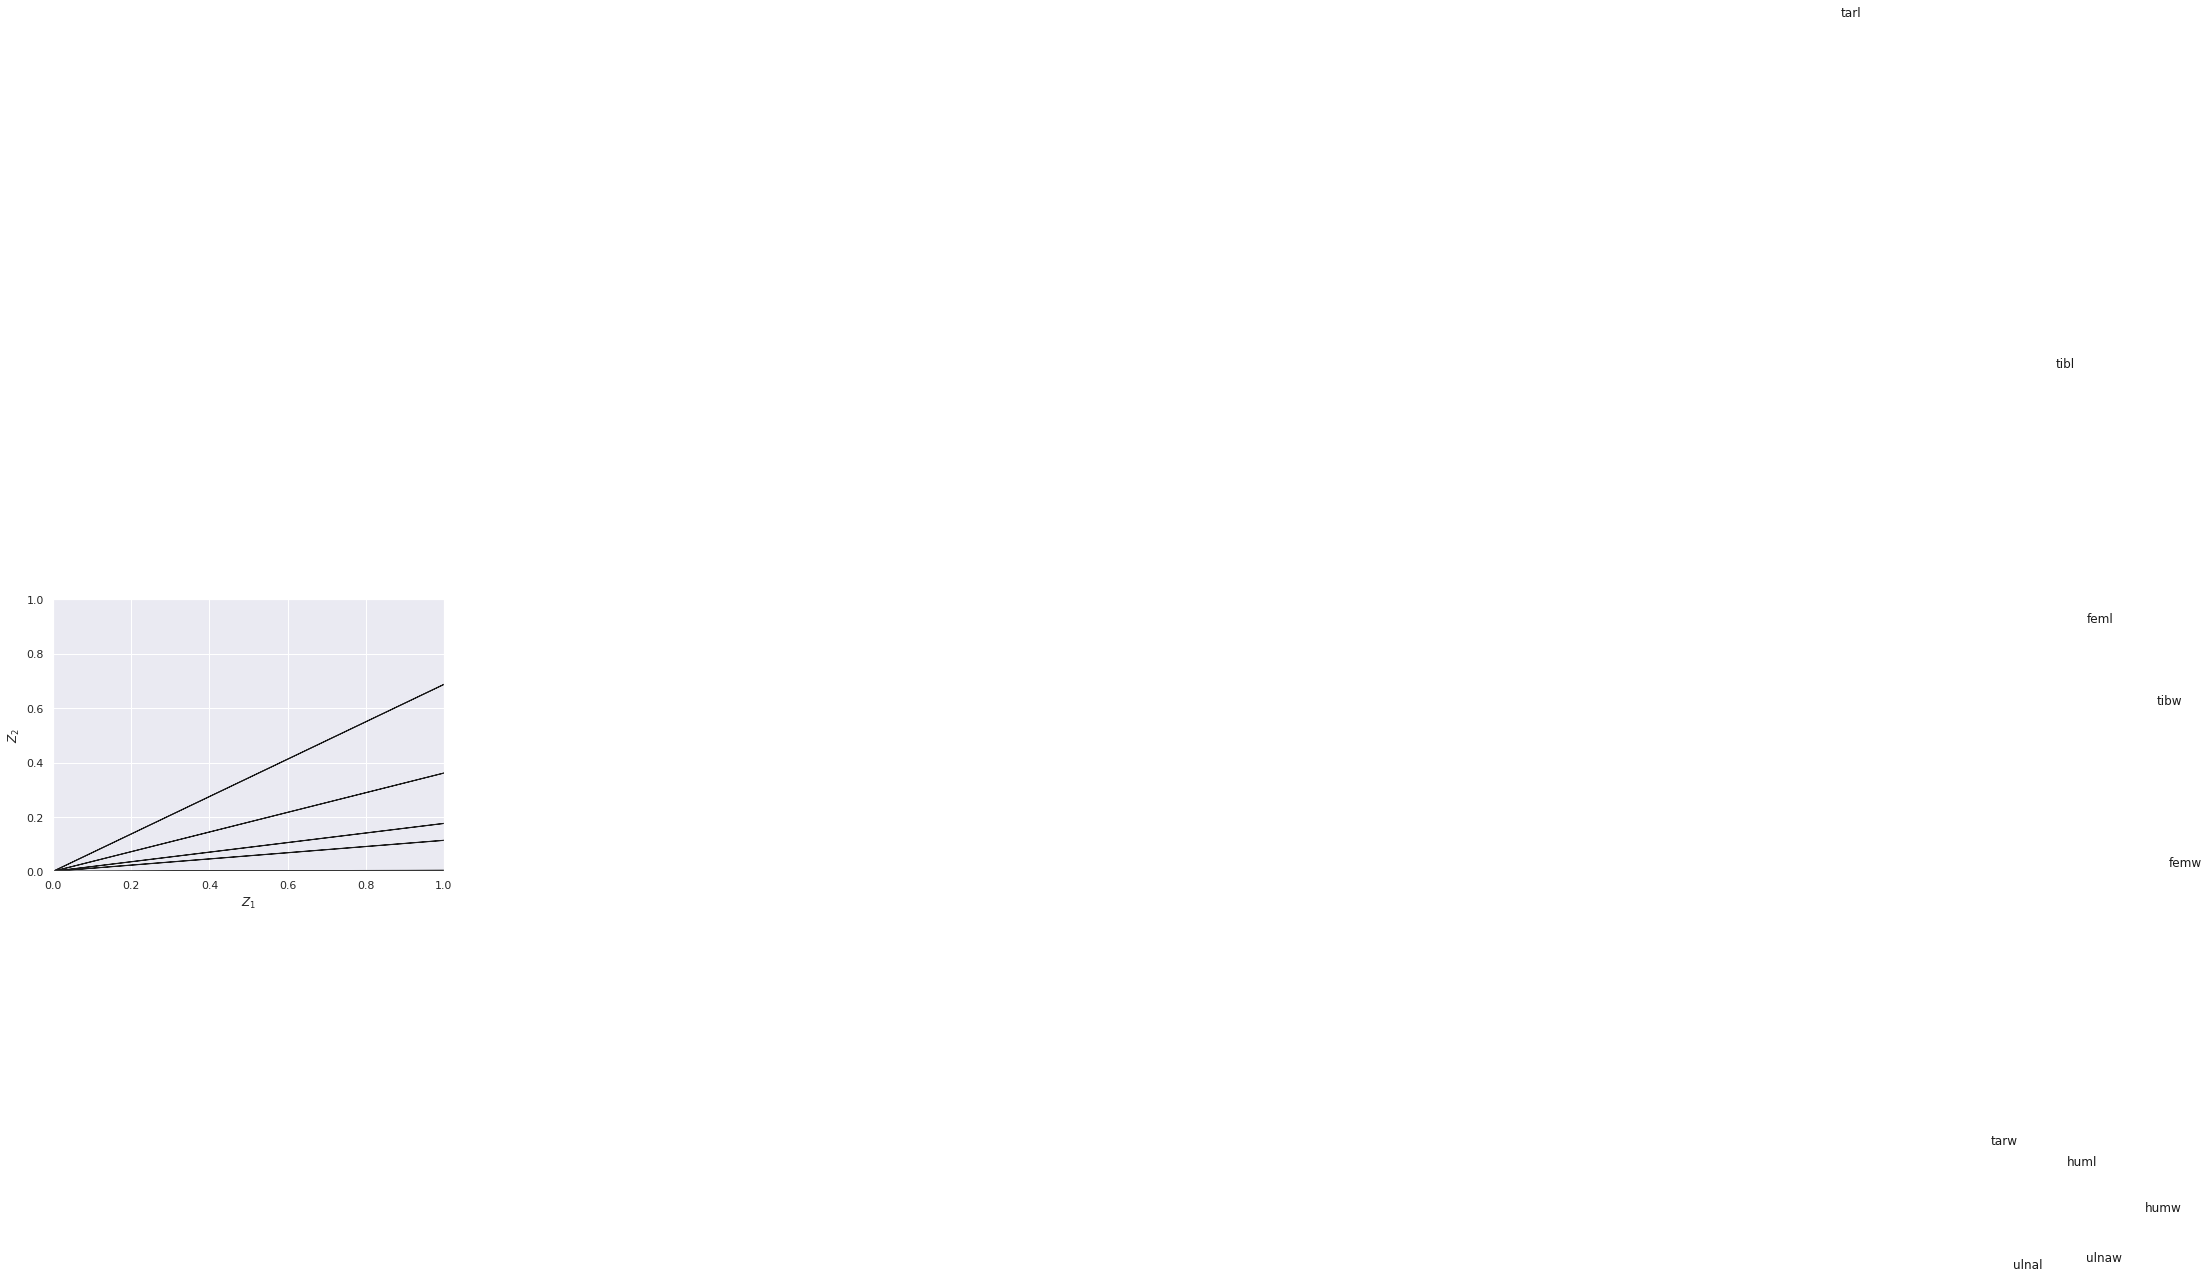

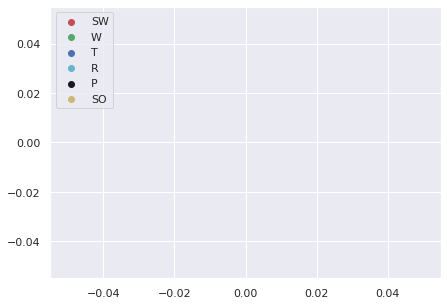

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')


plt. figure()
plt.scatter(Z[idx_SW,0], Z[idx_SW,1], c='r', label='SW')
plt.scatter(Z[idx_W,0], Z[idx_W,1], c='g', label='W')
plt.scatter(Z[idx_T,0], Z[idx_T,1], c='b', label='T')
plt.scatter(Z[idx_R,0], Z[idx_R,1], c='c', label='R')
plt.scatter(Z[idx_P,0], Z[idx_P,1], c='k', label='P')
plt.scatter(Z[idx_SO,0], Z[idx_SO,1], c='y', label='SO')

plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=ced1f40489ed90c8017d79d9f985a6f99d929e2ab104b839b815fe4ce6dd1999
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=2c1bf018ec232c997a5d10746e5d361b2666060c82a87ace0b3e2ce526a4b0fa
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3
0    0.478947 -1.081125  0.535761
1    1.606946 -0.338792  0.288401
2    1.043383 -0.320126  0.197379
3    0.574320 -0.372115  0.179899
4   -0.328672 -0.319613  0.200091
..        ...       ...       ...
408 -2.791882  0.066598  0.001189
409 -2.724960  0.101722 -0.036433
410 -2.672845  0.114386  0.021590
411 -2.547344  0.198200 -0.020948
412 -2.936440  0.089314 -0.059944

[413 rows x 3 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [413] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [413] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff0b9806610>)

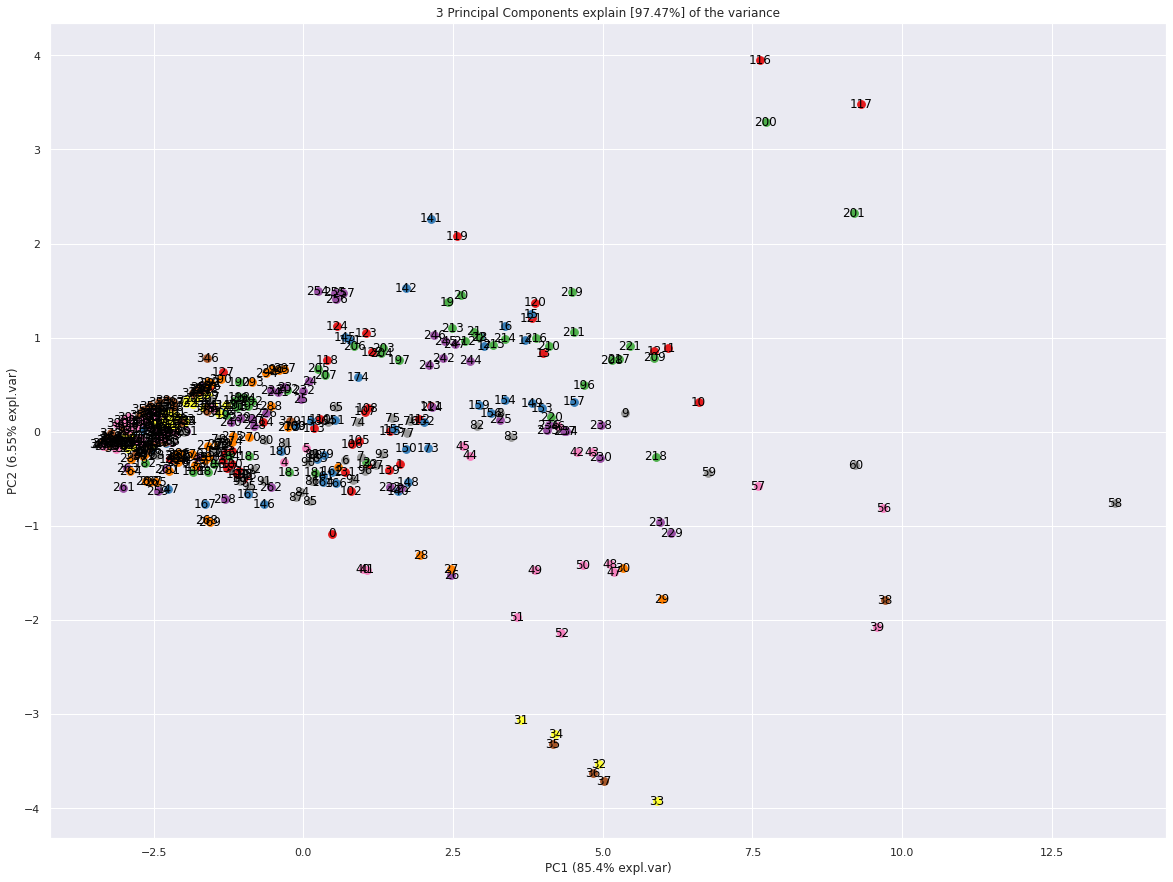

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

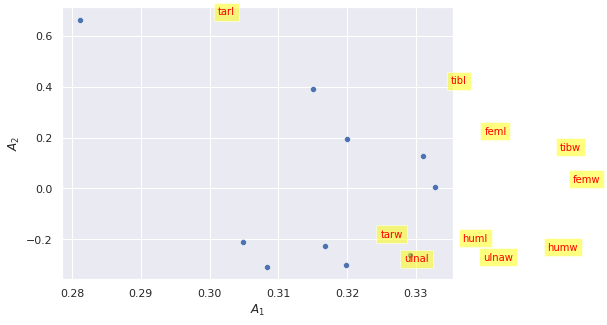

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

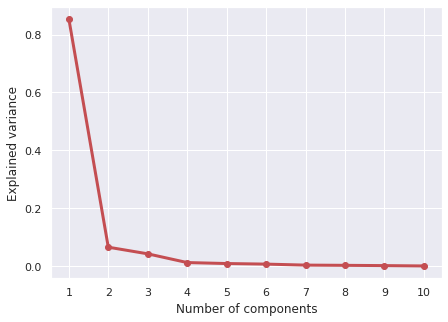

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

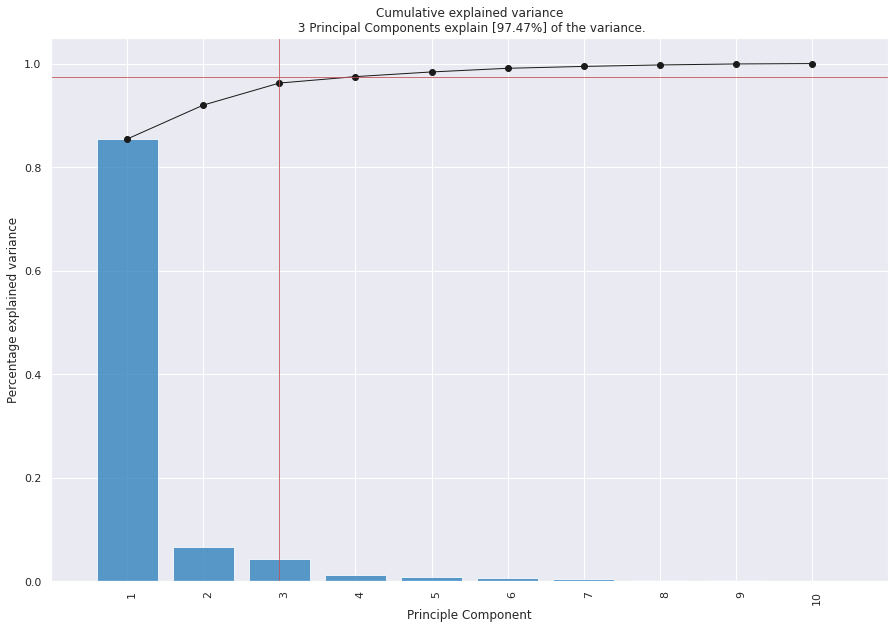

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [413] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [413] unique colors! Available unique colors: [9].


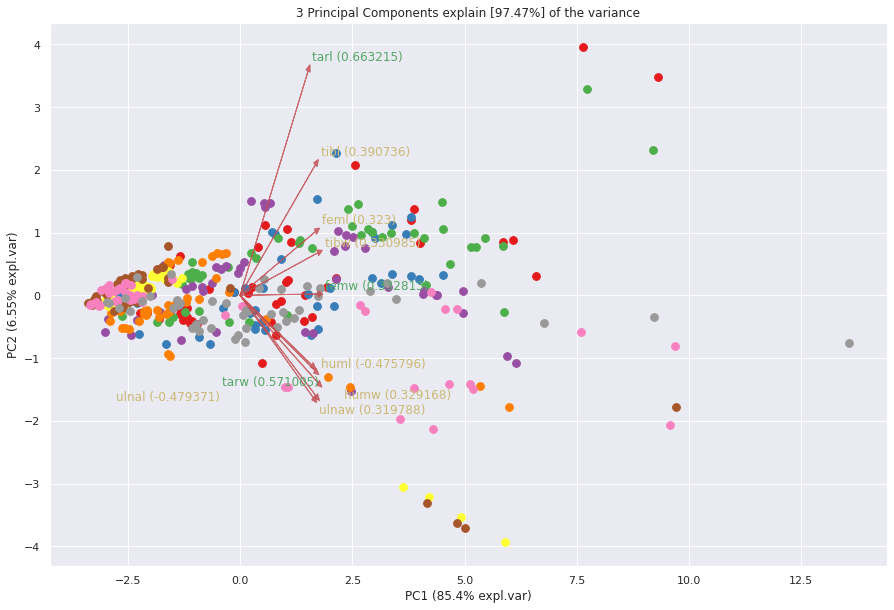

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff0ba106160>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [413] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [413] unique colors! Available unique colors: [9].


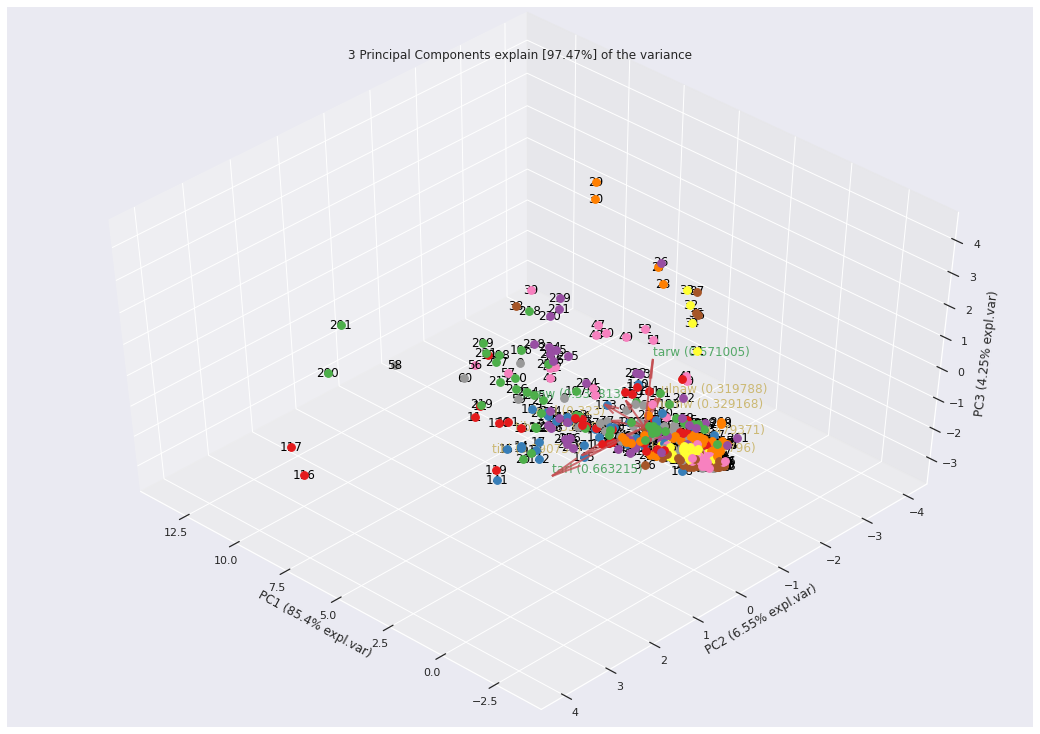

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7ff0ba0b77f0>)

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (372, 11)
Unseen Data For Predictions: (41, 11)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='type', train_size=0.7, session_id=123)

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                   Value  
0                                    123  
1                                   type  
2                             Multiclass  
3   P: 0, R: 1, SO: 2, SW: 3, T: 4, W: 5  
4                              (372, 11)  
5                                  False  
6                                     10  
7                                      0  
8                                  False  
9                                  False  
10                                  None  
11                             (260, 10)  
12                             (112, 10)  
13                                  True  
14                                 False  
15                       StratifiedKFold  
16                                    10  
17                                    -1  
18                                 False  
19                                 False  
20                      clf-default-name  
21                                  95d2  
22                                simple  
23                                  None  
24                                  mean  
25                                  None  
26                              constant  
27                  

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8500  0.9729  0.8162  0.8652   
et                 Extra Trees Classifier    0.8462  0.9612  0.7983  0.8375   
lightgbm  Light Gradient Boosting Machine    0.8115  0.9485  0.7783  0.8436   
rf               Random Forest Classifier    0.8000  0.9553  0.7523  0.7887   
gbc          Gradient Boosting Classifier    0.7923  0.9485  0.7456  0.7980   
qda       Quadratic Discriminant Analysis    0.7731  0.9520  0.7143  0.7830   
dt               Decision Tree Classifier    0.7154  0.8240  0.6870  0.7195   
knn                K Neighbors Classifier    0.7000  0.9103  0.6436  0.7053   
lda          Linear Discriminant Analysis    0.6962  0.9311  0.6144  0.6942   
ridge                    Ridge Classifier    0.6808  0.0000  0.5250  0.6323   
nb                            Naive Bayes    0.4923  0.8292  0.4106  0.5738   
svm                   SVM - Linear Kernel    0.4769  0.0000  0.3634  0.4441   
dummy                    Dummy Classifier    0.3077  0.5000  0.1667  0.0947   
ada                  Ada Boost Classifier    0.2923  0.7562  0.3048  0.3149   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8408  0.8052  0.8113     0.612  
et        0.8267  0.8003  0.8085     0.149  
lightgbm  0.8069  0.7571  0.7650     0.183  
rf        0.7788  0.7390  0.7490     0.192  
gbc       0.7766  0.7311  0.7392     0.551  
qda       0.7615  0.7083  0.7178     0.014  
dt        0.7042  0.6364  0.6426     0.012  
knn       0.6834  0.6136  0.6223     0.017  
lda       0.6591  0.5999  0.6238     0.012  
ridge     0.6198  0.5693  0.6061     0.009  
nb        0.4868  0.3678  0.3812     0.013  
svm       0.3996  0.3228  0.3741     0.017  
dummy     0.1448  0.0000  0.0000     0.014  
ada       0.2622  0.1337  0.1508     0.085

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6923  0.8132  0.7149  0.6955  0.6731  0.6105  0.6186
1       0.8462  0.9038  0.8512  0.8626  0.8472  0.8034  0.8080
2       0.9615  0.9792  0.8333  0.9359  0.9462  0.9497  0.9516
3       0.6923  0.7939  0.6528  0.6436  0.6574  0.5873  0.5936
4       0.6923  0.8188  0.7431  0.8147  0.7075  0.6134  0.6310
5       0.6154  0.7680  0.6359  0.6410  0.6209  0.5167  0.5197
6       0.6538  0.7793  0.6984  0.6795  0.6495  0.5610  0.5674
7       0.5385  0.7139  0.4028  0.4979  0.5081  0.4080  0.4152
8       0.8077  0.8842  0.7748  0.8231  0.8126  0.7561  0.7575
9       0.6538  0.7856  0.5625  0.6015  0.6199  0.5577  0.5630
Mean    0.7154  0.8240  0.6870  0.7195  0.7042  0.6364  0.6426
SD      0.1169  0.0734  0.1266  0.1282  0.1222  0.1491  0.1476

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6154  0.8420  0.6885  0.5842  0.5859  0.5194  0.5342
1       0.6923  0.9497  0.7208  0.6942  0.6806  0.6038  0.6073
2       0.7308  0.9255  0.5625  0.6445  0.6806  0.6396  0.6532
3       0.7308  0.8729  0.7083  0.6806  0.6954  0.6424  0.6477
4       0.8077  0.9035  0.8542  0.8246  0.8092  0.7543  0.7572
5       0.6538  0.8945  0.6290  0.6577  0.6530  0.5560  0.5570
6       0.7308  0.9036  0.7401  0.7830  0.7333  0.6598  0.6686
7       0.6154  0.8441  0.5417  0.5617  0.5676  0.5010  0.5111
8       0.6538  0.8850  0.5704  0.6577  0.6316  0.5526  0.5603
9       0.5385  0.8176  0.3819  0.4869  0.5066  0.4057  0.4097
Mean    0.6769  0.8838  0.6397  0.6575  0.6544  0.5835  0.5906
SD      0.0734  0.0385  0.1252  0.0945  0.0823  0.0929  0.0925

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5769  0.8659  0.6081  0.5173  0.5423  0.4563  0.4624
1       0.8077  0.9785  0.6500  0.8202  0.7725  0.7466  0.7621
2       0.7308  0.9572  0.5347  0.7415  0.7314  0.6473  0.6498
3       0.6538  0.8539  0.5972  0.6051  0.6138  0.5375  0.5444
4       0.6538  0.8894  0.6528  0.7205  0.6758  0.5602  0.5677
5       0.6538  0.9003  0.6944  0.6446  0.6316  0.5642  0.5706
6       0.7308  0.9445  0.7083  0.8078  0.7253  0.6560  0.6674
7       0.7692  0.8973  0.7083  0.7735  0.7594  0.7011  0.7054
8       0.7308  0.9168  0.6498  0.7083  0.7077  0.6579  0.6654
9       0.6923  0.8989  0.6319  0.7141  0.6745  0.6090  0.6281
Mean    0.7000  0.9103  0.6436  0.7053  0.6834  0.6136  0.6223
SD      0.0639  0.0375  0.0515  0.0889  0.0678  0.0813  0.0827

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6538  0.8568  0.6845  0.6090  0.6146  0.5534  0.5643
1       0.8846  0.9704  0.8500  0.9033  0.8738  0.8494  0.8562
2       0.8846  0.9565  0.7500  0.8729  0.8603  0.8482  0.8550
3       0.7692  0.8462  0.6806  0.8000  0.7316  0.6892  0.7042
4       0.7692  0.9445  0.7778  0.8470  0.7615  0.7023  0.7160
5       0.8462  0.9428  0.8194  0.8860  0.8197  0.8008  0.8135
6       0.7692  0.9134  0.7500  0.8423  0.7666  0.7051  0.7188
7       0.8846  0.9186  0.8542  0.9022  0.8806  0.8520  0.8553
8       0.6923  0.8702  0.6290  0.6516  0.6659  0.6075  0.6122
9       0.7308  0.9074  0.6667  0.7360  0.6817  0.6560  0.6741
Mean    0.7885  0.9127  0.7462  0.8050  0.7656  0.7264  0.7370
SD      0.0793  0.0407  0.0755  0.1001  0.0882  0.1013  0.0996

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9814  0.8540  0.8697  0.8459  0.8011  0.8058
1       0.8462  0.9880  0.7944  0.8761  0.8492  0.8015  0.8062
2       0.8846  0.9557  0.8750  0.9115  0.8877  0.8526  0.8575
3       0.7308  0.9555  0.6319  0.6538  0.6795  0.6345  0.6460
4       0.8462  0.9916  0.8264  0.8440  0.8383  0.7996  0.8027
5       0.8846  0.9795  0.8819  0.9154  0.8891  0.8537  0.8585
6       0.8846  0.9765  0.8333  0.9087  0.8749  0.8511  0.8561
7       0.8846  0.9766  0.8542  0.9022  0.8806  0.8520  0.8553
8       0.8846  0.9417  0.8403  0.9145  0.8817  0.8520  0.8586
9       0.8077  0.9829  0.7708  0.8561  0.7814  0.7543  0.7659
Mean    0.8500  0.9729  0.8162  0.8652  0.8408  0.8052  0.8113
SD      0.0469  0.0155  0.0694  0.0746  0.0621  0.0655  0.0633

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9871  0.8540  0.8825  0.8483  0.8030  0.8092
1       0.8846  0.9896  0.8278  0.8889  0.8836  0.8503  0.8519
2       0.8846  0.9573  0.8403  0.9103  0.8872  0.8503  0.8552
3       0.8077  0.9430  0.7500  0.7504  0.7768  0.7451  0.7497
4       0.8462  0.9877  0.8264  0.8440  0.8383  0.7996  0.8027
5       0.9231  0.9913  0.9375  0.9327  0.9245  0.9024  0.9042
6       0.8846  0.9783  0.8333  0.9087  0.8749  0.8511  0.8561
7       0.8462  0.9770  0.7708  0.7869  0.8128  0.8019  0.8066
8       0.8846  0.9380  0.8403  0.9022  0.8846  0.8534  0.8566
9       0.8846  0.9816  0.8542  0.9282  0.8876  0.8545  0.8609
Mean    0.8692  0.9731  0.8335  0.8735  0.8619  0.8312  0.8353
SD      0.0308  0.0187  0.0477  0.0581  0.0410  0.0416  0.0411

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7308  0.9279  0.7887  0.6417  0.6739  0.6560  0.6712
1       0.9231  1.0000  0.8833  0.9375  0.9186  0.9002  0.9037
2       0.9231  0.9715  0.7917  0.9017  0.9061  0.8986  0.9022
3       0.6923  0.9259  0.6528  0.6392  0.6463  0.5798  0.5958
4       0.7692  0.9673  0.7986  0.8201  0.7806  0.7068  0.7149
5       0.8462  0.9546  0.8373  0.9038  0.8487  0.8038  0.8146
6       0.8462  0.9617  0.8264  0.9021  0.8515  0.7992  0.8156
7       0.6923  0.9415  0.6042  0.6542  0.6593  0.6023  0.6095
8       0.8846  0.9649  0.7917  0.8279  0.8490  0.8485  0.8575
9       0.6923  0.9373  0.5486  0.6585  0.6546  0.5945  0.6047
Mean    0.8000  0.9553  0.7523  0.7887  0.7788  0.7390  0.7490
SD      0.0907  0.0216  0.1048  0.1194  0.1045  0.1201  0.1179

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6923  0.8802  0.7679  0.6663  0.6620  0.6176  0.6293
1       0.8846  0.9822  0.8500  0.9202  0.8795  0.8509  0.8591
2       0.8077  0.9669  0.6944  0.8304  0.8103  0.7514  0.7543
3       0.7308  0.8784  0.6944  0.7238  0.7078  0.6389  0.6485
4       0.6538  0.9019  0.7014  0.7205  0.6611  0.5667  0.5775
5       0.6923  0.9294  0.7153  0.6574  0.6602  0.6134  0.6215
6       0.6154  0.9340  0.6220  0.7000  0.6226  0.5247  0.5385
7       0.6538  0.9149  0.6458  0.6863  0.6341  0.5667  0.5807
8       0.8462  0.9372  0.8095  0.8632  0.8383  0.8030  0.8077
9       0.6154  0.8896  0.5069  0.6068  0.6015  0.5076  0.5155
Mean    0.7192  0.9215  0.7008  0.7375  0.7077  0.6441  0.6533
SD      0.0911  0.0335  0.0926  0.0953  0.0936  0.1123  0.1101

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 13
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9871  0.8540  0.8825  0.8483  0.8030  0.8092
1       0.8846  0.9896  0.8278  0.8889  0.8836  0.8503  0.8519
2       0.8846  0.9573  0.8403  0.9103  0.8872  0.8503  0.8552
3       0.8077  0.9430  0.7500  0.7504  0.7768  0.7451  0.7497
4       0.8462  0.9877  0.8264  0.8440  0.8383  0.7996  0.8027
5       0.9231  0.9913  0.9375  0.9327  0.9245  0.9024  0.9042
6       0.8846  0.9783  0.8333  0.9087  0.8749  0.8511  0.8561
7       0.8462  0.9770  0.7708  0.7869  0.8128  0.8019  0.8066
8       0.8846  0.9380  0.8403  0.9022  0.8846  0.8534  0.8566
9       0.8846  0.9816  0.8542  0.9282  0.8876  0.8545  0.8609
Mean    0.8692  0.9731  0.8335  0.8735  0.8619  0.8312  0.8353
SD      0.0308  0.0187  0.0477  0.0581  0.0410  0.0416  0.0411

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                   Value  
0                                    123  
1                                   type  
2                             Multiclass  
3   P: 0, R: 1, SO: 2, SW: 3, T: 4, W: 5  
4                              (372, 11)  
5                                  False  
6                                     10  
7                                      0  
8                                  False  
9                                  False  
10                                  None  
11                              (260, 3)  
12                              (112, 3)  
13                                  True  
14                                 False  
15                       StratifiedKFold  
16                                    10  
17                                    -1  
18                                 False  
19                                 False  
20                      clf-default-name  
21                                  4379  
22                                simple  
23                                  None  
24                                  mean  
25                                  None  
26                              constant  
27                  

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('dummy', Dummify(target='type')),
                ('fix_perfect', Remove_100(target='type')),
                ('clean_names', Clean_Colum_Names()),
         

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.9324  0.9809  0.9300  0.9456   
lr                    Logistic Regression    0.9247  0.9830  0.9217  0.9377   
nb                            Naive Bayes    0.9247  0.9851  0.9217  0.9333   
rf               Random Forest Classifier    0.9247  0.9694  0.9250  0.9415   
lda          Linear Discriminant Analysis    0.9247  0.9865  0.9233  0.9379   
et                 Extra Trees Classifier    0.9176  0.9746  0.9167  0.9322   
lightgbm  Light Gradient Boosting Machine    0.9176  0.9658  0.9150  0.9339   
ridge                    Ridge Classifier    0.9170  0.0000  0.9167  0.9313   
qda       Quadratic Discriminant Analysis    0.9093  0.9850  0.9067  0.9195   
svm                   SVM - Linear Kernel    0.9027  0.0000  0.9017  0.9156   
gbc          Gradient Boosting Classifier    0.8874  0.9664  0.8850  0.8996   
dt               Decision Tree Classifier    0.8868  0.9150  0.8833  0.9126   
ada                  Ada Boost Classifier    0.8516  0.9552  0.8517  0.8977   
dummy                    Dummy Classifier    0.3176  0.5000  0.3333  0.1012   

              F1   Kappa     MCC  TT (Sec)  
knn       0.9307  0.8979  0.9051     0.113  
lr        0.9230  0.8863  0.8934     0.017  
nb        0.9234  0.8864  0.8912     0.013  
rf        0.9229  0.8869  0.8961     0.450  
lda       0.9232  0.8865  0.8936     0.012  
et        0.9158  0.8762  0.8841     0.452  
lightgbm  0.9155  0.8758  0.8847     0.057  
ridge     0.9140  0.8751  0.8842     0.010  
qda       0.9079  0.8632  0.8687     0.011  
svm       0.8996  0.8531  0.8627     0.059  
gbc       0.8863  0.8299  0.8367     0.183  
dt        0.8850  0.8291  0.8425     0.013  
ada       0.8412  0.7775  0.8003     0.078  
dummy     0.1534  0.0000  0.0000     0.015

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

In [ ]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [ ]:
!pip install numba==0.53

In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8881  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9611  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9487  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9177  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9786  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9694  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0381  0.0588  0.0453  0.0602  0.0875  0.0798

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9254  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9532  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9904  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9647  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9825  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0247  0.0588  0.0453  0.0602  0.0875  0.0798

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


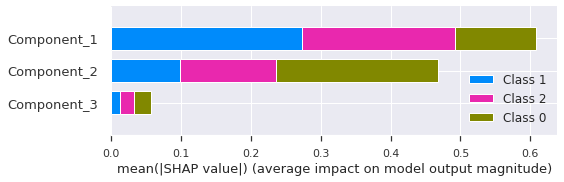

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
